<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Networkx-Introduction" data-toc-modified-id="Networkx-Introduction-1">Networkx Introduction</a></span></li><li><span><a href="#Graph-Nodes-and-Edges" data-toc-modified-id="Graph-Nodes-and-Edges-2">Graph Nodes and Edges</a></span></li><li><span><a href="#Drawing" data-toc-modified-id="Drawing-3">Drawing</a></span></li><li><span><a href="#Basic-Graph-Inspection-and-Properties" data-toc-modified-id="Basic-Graph-Inspection-and-Properties-4">Basic Graph Inspection and Properties</a></span></li><li><span><a href="#Fancy-Algorithmic-Example" data-toc-modified-id="Fancy-Algorithmic-Example-5">Fancy Algorithmic Example</a></span></li></ul></div>

# Networkx Introduction

This Jupyter Notebook serves as a very general introduction to the basic features of Networkx, independent of the book.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import lib
from random import sample

# Graph Nodes and Edges

In [ ]:
G = nx.DiGraph()  # G = nx.Graph

In [ ]:
# G.add_node(1)
G.add_nodes_from([
    (0, {"city": "Hamburg"}),
    (1, {"city": "Berlin"}),
    (2, {"city": "Munich"}),
    (3, {"city": "Cologne"}),
    (4, {"city": "Frankfurt"}),
])

In [ ]:
# G.add_edge(1, 2)
G.add_edges_from([
    (0, 1, {"weight": 1, "color": "b"}),
    (1, 0, {"weight": 5.3, "color": "k"}),
    (1, 2, {"weight": 1.5, "color": "g"}),
    (3, 2, {"weight": 2, "color": "r"}),
    (3, 4, {"weight": 1.2, "color": "c"}),
    (4, 0, {"weight": 2.5, "color": "m"}),
    (4, 2, {"weight": 4.5, "color": "y"})
])
print(G)

In [ ]:
# Adjacency Matrix
A = nx.linalg.graphmatrix.adjacency_matrix(G)
print(A)
print(A.toarray())

In [ ]:
# Accessing edges (Directed Graph)
print(G.adj[1])
print(G[1])
print(G[1][2])
print(list(G.successors(1)))
print(list(G.predecessors(1)))

# Drawing

In [ ]:
pos = {0:[0.2,0.2], 1:[.4,.2], 2:[.7,.2], 3:[.7,.6], 4:[.4,.6]}  # Define individual position of nodes
# pos = np.drawing.layout.spring_layout(G)

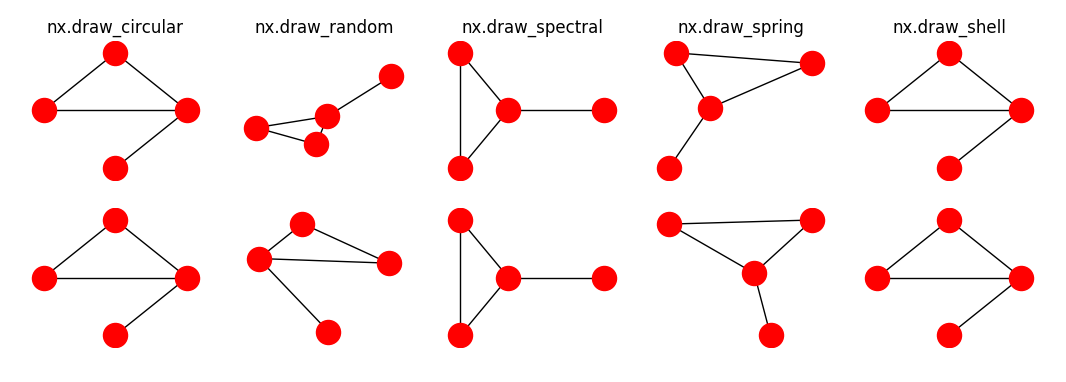

In [ ]:
custom_figsize= (8, 4)  # Define custome figsize
fig, ax1 = plt.subplots(figsize = custom_figsize)  # Init figure
nx.draw_networkx(G, pos=pos, node_size=400, ax=ax1)  # Draw network

In [ ]:
# A little bit more fancy please
fig, ax2 = plt.subplots(figsize = custom_figsize)  # Init figure
def fancy_plot():
    ax2.clear()
    nx.draw_networkx(G, pos=pos, node_size=400, ax=ax2,
                     edge_color=[G[u][v]['color'] for u,v in G.edges()],  # Colors from attributes
                     width=[G[u][v]['weight'] for u,v in G.edges()],  # Weights used as width
                     connectionstyle='arc3, rad = 0.1')  # Make curvy connections

    nx.draw_networkx_labels(G, ax=ax2,
                            pos=[(coords[0], coords[1] - 0.06) for _, coords in pos.items()],  # Add vertical offset to defined position
                            labels=nx.get_node_attributes(G, 'city')  # City as label
                            )
    ax2.margins(0.10)  # Zooming out for better visualization
fancy_plot()

# Basic Graph Inspection and Properties

In [ ]:
print("Out-degree of DiGraph Example without weights in Format (Node, out-degree): \n" , G.out_degree())
print("\n In-degree of DiGraph Example without weights in Format (Node, in-degree): \n" , G.in_degree())

print("\n Out-degree of DiGraph Example with weights in Format (Node, out-degree): \n" , G.out_degree(weight = "weight"))
print("\n In-degree of DiGraph Example with weights in Format (Node, in-degree): \n" , G.in_degree(weight = "weight"))

In [ ]:
# Question: strongly connected?
fig

In [ ]:
nx.is_strongly_connected(G)

In [ ]:
# Make strongly connected
G.add_edges_from([(2, 3, {"weight": 0.7, "color": "k"})])
fancy_plot()
fig

In [ ]:
# Question: periodicity
lib.is_periodic(G)

In [ ]:
list(nx.algorithms.cycles.simple_cycles(G))

# Fancy Algorithmic Example

In [2]:
#https://networkx.org/documentation/latest/auto_examples/algorithms/plot_betweenness_centrality.html#sphx-glr-auto-examples-algorithms-plot-betweenness-centrality-py

# Gold standard data of positive gene functional associations
# from https://www.inetbio.org/wormnet/downloadnetwork.php , the second link is the benchmark
G = nx.read_edgelist("WormNet.v3.benchmark.txt")

# remove randomly selected nodes (to make example fast)
num_to_remove = int(len(G) / 1.5)
nodes = sample(list(G.nodes), num_to_remove)
G.remove_nodes_from(nodes)

# remove low-degree nodes
low_degree = [n for n, d in G.degree() if d < 10]
G.remove_nodes_from(low_degree)

In [3]:
# largest connected component
components = nx.connected_components(G)
largest_component = max(components, key=len)
H = G.subgraph(largest_component)

# compute centrality https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html
centrality = nx.betweenness_centrality(H, k=10, endpoints=True)

# compute community structure
lpc = nx.community.label_propagation_communities(H)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

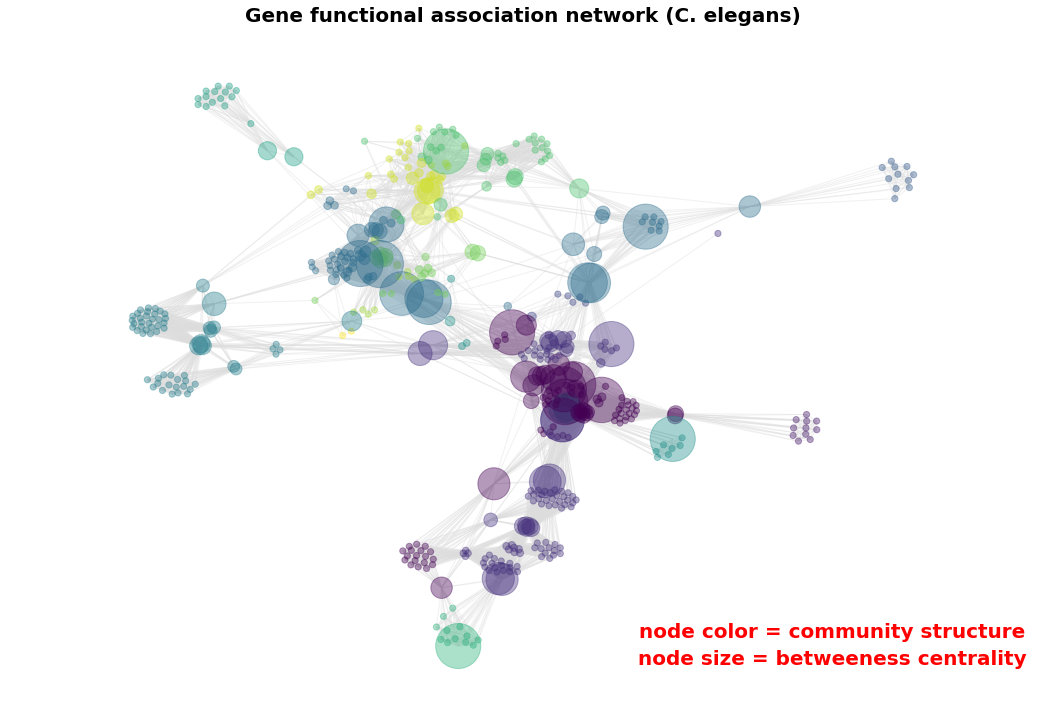

In [4]:
#### draw graph ####
fig, ax = plt.subplots(figsize=(15, 10))
pos_g = nx.spring_layout(H, k=0.15, seed=4572321)
node_color = [community_index[n] for n in H]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx(
    H,
    pos=pos_g,
    with_labels=False,
    node_color=node_color,
    node_size=node_size,
    edge_color="gainsboro",
    alpha=0.4,
)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Gene functional association network (C. elegans)", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off");